# Обучение с учителем. Нейронные сети

## Импорты

In [11]:

import tensorflow as tf
import datetime
import subprocess
import webbrowser
import time

import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import display, IFrame
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Теория

**Обучение с учителем** предполагает наличие полного набора размеченных данных для тренировки модели на всех этапах ее построения. Наличие полностью размеченного датасета означает, что каждому примеру в обучающем наборе соответствует ответ, который алгоритм и должен получить. В задачах классификации алгоритм предсказывает дискретные значения, соответствующие номерам классов, к которым принадлежат объекты.

## Цель работы

Исследование принципов разработки нейронной сети на примере задачи классификации изображений.

## Постановка задачи

Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10 категориям (от 0 до 9). Для работы будет использоваться датасет MNIST, который содержит 60,000 изображений для обучения и 10,000 изображений для тестирования.

1. Исследовать нейронную сеть при заданных начальных параметрах (см. приложенный файл). Оцените точность прогноза, даваемого вашей моделью. С помощью TensorBoard - Scalars Dashboard и Graphs Dashboard (концептуальный граф, выберите тег «keras»), зафиксируйте в отчете графики изменения точности и потерь, а также концептуальный граф исходной модели.
2. Создайте и обучите, фиксируя точность, ещё не менее трех моделей нейронной сети: с иным количеством слоёв, нейронов в них и функциями активации; с различным количеством эпох обучения; с иным методом оптимизации. Оцените точность прогнозов, выдаваемых моделями, сделайте выводы.
3. Найти архитектуру сети, при которой точность классификации будет не менее 99%. С помощью TensorBoard - Scalars Dashboard и Graphs Dashboard (концептуальный граф, выберите тег «keras»), зафиксируйте в отчете графики изменения точности и потерь, а также концептуальный граф улучшенной модели.

## Датасет

База данных MNIST — объёмная база данных образцов рукописного написания цифр.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Исследование нейронной сети

Создадим простую нейронную сеть для классификации изображений размером 28x28, состоящую из двух полносвязных слоев.
Нейронная сеть типа многослойного перцептрона (MLP, multilayer perceptron), которая относится к полносвязным нейронным сетям (или fully connected networks):
![perceptrone](https://datascientest.com/en/files/2021/04/illu_perceptron_blog-138.png)

In [3]:
simple_model =  tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

simple_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Обучение модели

In [4]:
log_dir = "logs/fit/simple_model" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = simple_model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6870 - loss: 1.1180 - val_accuracy: 0.9004 - val_loss: 0.3793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8958 - loss: 0.3746 - val_accuracy: 0.9146 - val_loss: 0.3116
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9098 - loss: 0.3197 - val_accuracy: 0.9200 - val_loss: 0.2789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9193 - loss: 0.2864 - val_accuracy: 0.9269 - val_loss: 0.2600
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9244 - loss: 0.2667 - val_accuracy: 0.9313 - val_loss: 0.2445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9293 - loss: 0.2489 - val_accuracy: 0.9327 - val_loss: 0.2331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.9318 - loss: 0.2385 - val_accuracy: 0.9373 - val_loss: 0.2215
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9371 - l

### Tenserboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [5]:
tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
time.sleep(5)
webbrowser.open('http://localhost:6006')

True

### Графики из Tenserboard

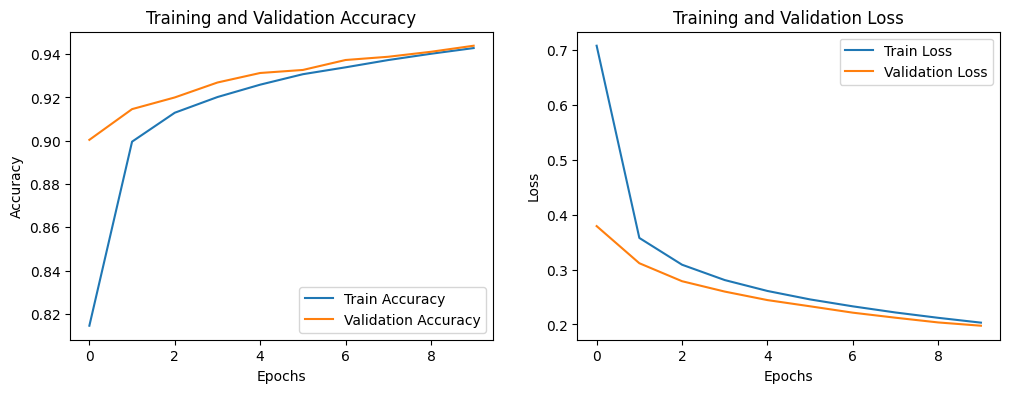

In [6]:
train_log_dir = log_dir + "/train"
train_ea = event_accumulator.EventAccumulator(train_log_dir)

val_log_dir = log_dir + "/validation"
val_ea = event_accumulator.EventAccumulator(val_log_dir)

train_ea.Reload()
val_ea.Reload()

def extract_tensor_values(event_accumulator, tag):
    events = event_accumulator.Tensors(tag)
    steps = [e.step for e in events]
    values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
    return steps, values

train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()



### Концептуальный граф

![simple_model_graph](conceptual_graphs/simple_model.png)

На графе:
* Input Layer — определяет форму входных данных (например, 28x28 изображений).
* Flatten — преобразует 2D-данные в 1D вектор.
* Dense — первый полносвязный слой, состоящий из 32 нейронов с функцией активации ReLU.
* Dense_1 — выходной полносвязный слой с 10 нейронами (для 10 классов) и функцией активации softmax, которая дает вероятности для каждого класса.

## Перебор сетей с разными конфигурациями

Создайте и обучите, фиксируя точность, ещё не менее трех моделей нейронной сети: с иным количеством слоёв, нейронов в них и функциями активации; с различным количеством эпох обучения; с иным методом оптимизации.

In [7]:
configs = [
    {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10},
    {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}
]

Тренировка модели с конфигурацией №0:
 {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5}


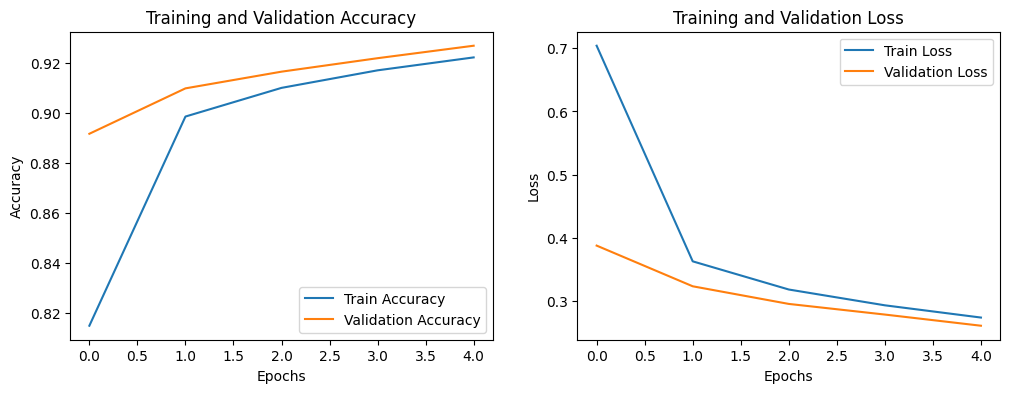

Тренировка модели с конфигурацией №1:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10}


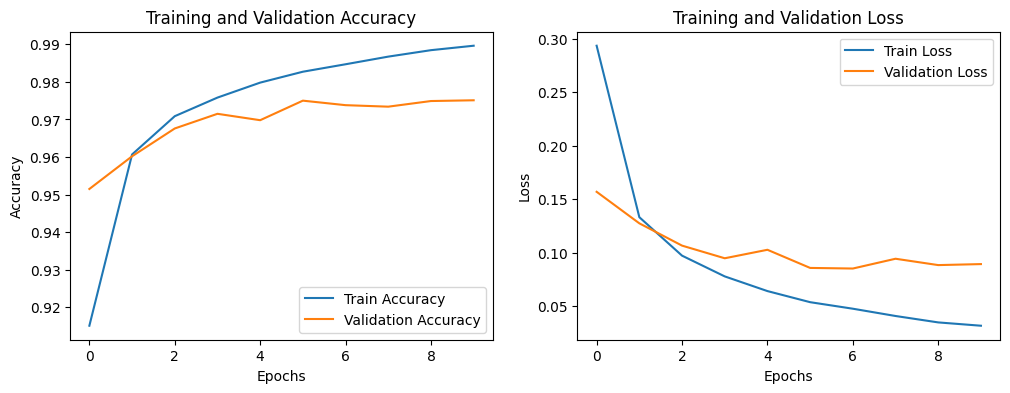

Тренировка модели с конфигурацией №2:
 {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15}


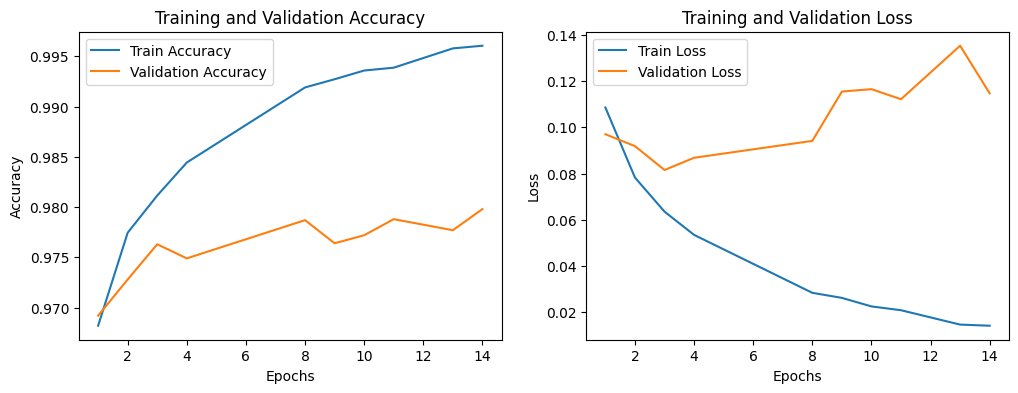

Тренировка модели с конфигурацией №3:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20}


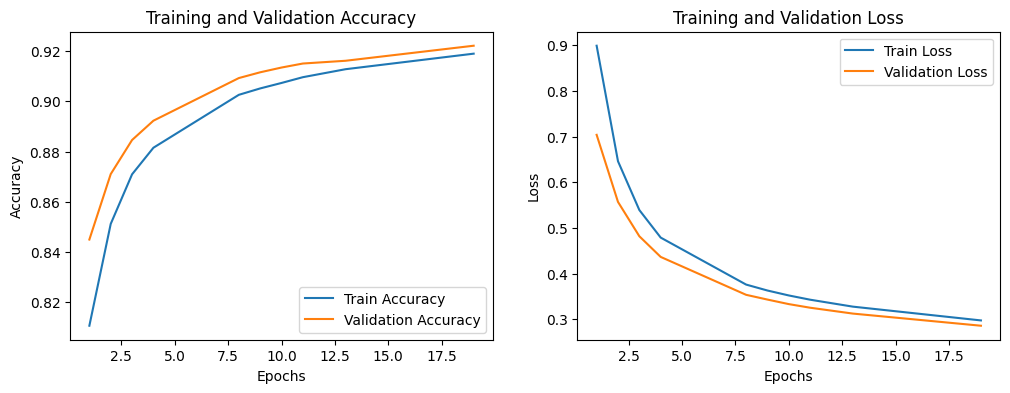

Тренировка модели с конфигурацией №4:
 {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}


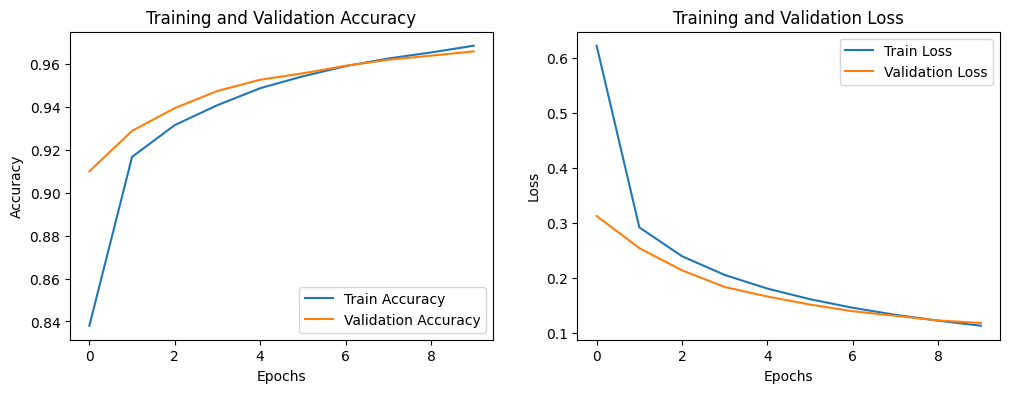

In [10]:
for i,config in enumerate(configs):
    print(f"Тренировка модели с конфигурацией №{i}:\n {config}")
    
    # Создание модели
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))  
    model.add(tf.keras.layers.Flatten())  
    for neurons, activation in zip(config['layers'][:-1], config['activation'][:-1]):
        model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(config['layers'][-1], activation=config['activation'][-1]))  
    
    model.compile(optimizer=config['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    log_dir = f"logs/fit/config_{i}_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = model.fit(x_train, y_train, epochs=config['epochs'], validation_data=(x_test, y_test), callbacks=[tensorboard_callback], verbose=0)
    
    time.sleep(5)

    train_log_dir = log_dir + "/train"
    train_ea = event_accumulator.EventAccumulator(train_log_dir)
    train_ea.Reload()

    val_log_dir = log_dir + "/validation"
    val_ea = event_accumulator.EventAccumulator(val_log_dir)
    val_ea.Reload()

    def extract_tensor_values(event_accumulator, tag):
        events = event_accumulator.Tensors(tag)
        steps = [e.step for e in events]
        values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
        return steps, values

    train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
    train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

    val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
    val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

    # Построение графиков
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
    plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
    plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training and Validation Loss")

    plt.show()

    # Запуск TensorBoard
    tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
    time.sleep(5)
    webbrowser.open(f'http://localhost:{6006 + i}')

### Концептуальный граифик

![simple_model_graph](conceptual_graphs/simple_model.png)

### Выводы по перебранным моделям

Мы перебирали из моделей:  
```python
configs = [
    {'layers': [32, 10], 'activation': ['relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 5},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 10},
    {'layers': [128, 64, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 15},
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 128, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'SGD', 'epochs': 10}
]
```  
Значения accuracy, соответствующие каждой кинфугурации:

0. 94
1. 93
2. 07
3. 98
4. 92


Какие можно сделать выводы?  

1. **Лучшая конфигурация (№3)**:
   - Конфигурация с 64, 32 и 10 нейронами в слоях, активацией `relu` и оптимизатором `Adagrad`, 20 эпох — **точность 98%**.
   - Эта модель показала наилучшие результаты, вероятно, из-за адаптивной скорости обучения в `Adagrad`.

2. **Роль структуры модели**:
   - Увеличение количества нейронов и слоев не всегда улучшает результаты. Например, конфигурация с 128 нейронами (№2 и №4) показала худшие результаты, что может свидетельствовать о переобучении.

3. **Активация**:
   - `ReLU` на скрытых слоях эффективно работает в большинстве конфигураций, а `softmax` на выходном слое — стандарт для многоклассовой классификации.

4. **Оптимизатор**:
   - `Adagrad` (в конфигурации №3) оказался наиболее эффективным, превосходя другие оптимизаторы (SGD, Adam, RMSprop).

5. **Эпохи**:
   - Увеличение числа эпох не всегда улучшает точность. Например, конфигурация с 5 эпохами (№0) имеет точность 94%, а с 20 эпохами (№4) — только 92%.


## Сеть с точностью. свыше 99%

In [25]:
configs = [
    {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20},
    {'layers': [128, 64, 32, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 25},
    {'layers': [256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 30},
    {'layers': [512, 256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Nadam', 'epochs': 30}
]


Тренировка модели с конфигурацией №0:
 {'layers': [64, 32, 10], 'activation': ['relu', 'relu', 'softmax'], 'optimizer': 'Adagrad', 'epochs': 20}


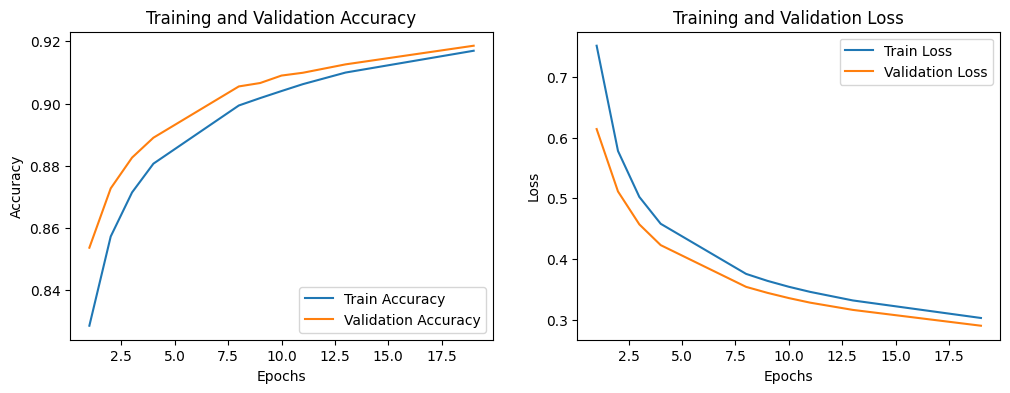

Тренировка модели с конфигурацией №1:
 {'layers': [128, 64, 32, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Adam', 'epochs': 25}


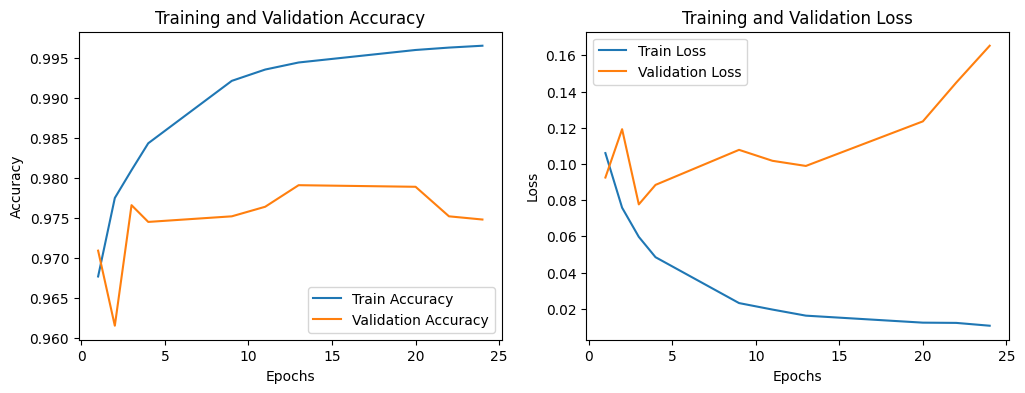

Тренировка модели с конфигурацией №2:
 {'layers': [256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'softmax'], 'optimizer': 'RMSprop', 'epochs': 30}


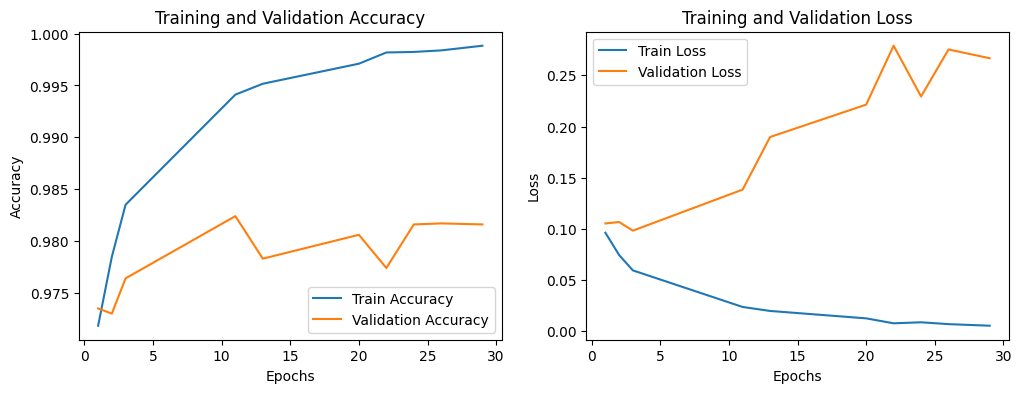

Тренировка модели с конфигурацией №3:
 {'layers': [512, 256, 128, 64, 10], 'activation': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'optimizer': 'Nadam', 'epochs': 30}


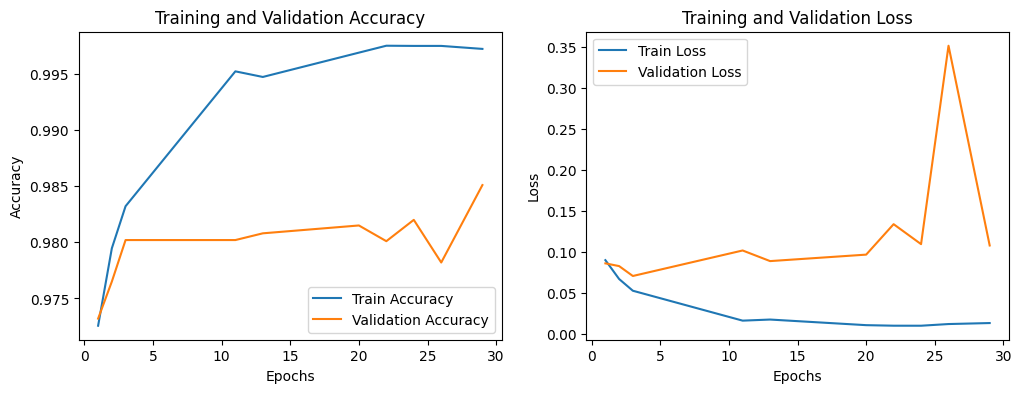

In [26]:
for i,config in enumerate(configs):
    print(f"Тренировка модели с конфигурацией №{i}:\n {config}")
    
    # Создание модели
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))  
    model.add(tf.keras.layers.Flatten())  
    for neurons, activation in zip(config['layers'][:-1], config['activation'][:-1]):
        model.add(tf.keras.layers.Dense(neurons, activation=activation))
    model.add(tf.keras.layers.Dense(config['layers'][-1], activation=config['activation'][-1]))  
    
    model.compile(optimizer=config['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    log_dir = f"logs/fit/best_config_{i}_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    history = model.fit(x_train, y_train, epochs=config['epochs'], validation_data=(x_test, y_test), callbacks=[tensorboard_callback], verbose=0)
    
    time.sleep(5)

    train_log_dir = log_dir + "/train"
    train_ea = event_accumulator.EventAccumulator(train_log_dir)
    train_ea.Reload()

    val_log_dir = log_dir + "/validation"
    val_ea = event_accumulator.EventAccumulator(val_log_dir)
    val_ea.Reload()

    def extract_tensor_values(event_accumulator, tag):
        events = event_accumulator.Tensors(tag)
        steps = [e.step for e in events]
        values = [tf.make_ndarray(e.tensor_proto).item() for e in events]
        return steps, values

    train_accuracy_steps, train_accuracy_values = extract_tensor_values(train_ea, "epoch_accuracy")
    train_loss_steps, train_loss_values = extract_tensor_values(train_ea, "epoch_loss")

    val_accuracy_steps, val_accuracy_values = extract_tensor_values(val_ea, "epoch_accuracy")
    val_loss_steps, val_loss_values = extract_tensor_values(val_ea, "epoch_loss")

    # Построение графиков
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy_steps, train_accuracy_values, label='Train Accuracy')
    plt.plot(val_accuracy_steps, val_accuracy_values, label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_steps, train_loss_values, label='Train Loss')
    plt.plot(val_loss_steps, val_loss_values, label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training and Validation Loss")

    plt.show()

    # Запуск TensorBoard
    tensorboard = subprocess.Popen(['tensorboard', '--logdir', log_dir])
    time.sleep(5)
    webbrowser.open(f'http://localhost:{6006 + i}')

Accuracy:
0. 94%
1. 93%
2. 97%
3. 98%